In [126]:
# import library yang dibutuhkan
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from statsmodels.stats.weightstats import ztest

def markdown(inputstr):
    display(Markdown(inputstr))

In [127]:
# read csv
df_train = pd.read_csv("../data/data_train.csv")
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,804,1,0.8,1,12,1,41,0.9,89,1,...,709,818,2027,11,5,11,1,0,0,1
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
2,1481,1,2.0,1,0,0,35,0.5,105,3,...,249,522,2635,17,16,4,1,0,1,2
3,1104,0,1.7,0,1,1,60,0.4,199,2,...,653,1413,1229,6,0,3,1,1,1,0
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,536,1,1.4,0,0,1,53,0.7,135,3,...,547,705,1211,15,10,7,1,0,1,0
1396,1097,0,0.8,0,10,1,21,0.1,160,7,...,1277,1352,2219,15,6,12,1,0,1,2
1397,1179,1,0.5,0,7,1,32,0.3,182,2,...,85,1451,340,16,5,16,1,0,0,0
1398,719,1,0.5,1,0,1,23,0.4,113,6,...,431,1727,3990,14,9,12,1,1,1,3


#### 1. Duplicate value pada kolom battery_power

In [128]:
df_train.duplicated('battery_power').sum()

482

In [129]:
df_train[df_train['battery_power'].duplicated(keep=False)].head(30)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1042,0,2.2,0,15,1,11,0.6,139,5,...,68,1018,2826,18,0,2,1,0,0,2
4,652,0,0.5,1,1,0,58,0.6,142,3,...,464,781,565,18,12,9,0,0,1,0
5,508,1,1.3,0,1,0,50,0.7,82,5,...,102,1195,2175,14,4,14,0,0,1,1
10,1042,0,2.7,1,16,1,50,0.8,93,7,...,727,1705,3215,18,0,20,1,1,1,3
11,580,1,2.1,1,0,0,24,0.4,135,4,...,404,898,3565,12,11,8,1,0,1,2
12,538,0,1.1,1,0,1,25,0.3,163,7,...,455,537,2215,9,3,17,1,1,1,1
15,1991,1,2.7,0,5,1,64,0.9,145,2,...,1058,1325,1733,5,3,8,1,1,0,2
17,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
22,1617,1,1.3,1,3,1,30,0.7,105,2,...,246,1038,829,9,0,10,1,0,0,0
23,1034,0,2.6,1,2,1,45,0.3,190,3,...,182,1293,969,15,1,7,1,0,0,0


In [130]:
df_train.loc[df_train['ram'].duplicated(keep='first'), :]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
62,1881,0,2.2,0,4,0,51,0.3,158,5,...,477,1553,1229,12,0,14,1,0,0,1
182,516,0,1.1,1,0,1,39,0.4,91,5,...,855,1401,819,8,0,10,1,1,1,0
206,1348,0,1.3,0,0,0,43,0.4,116,5,...,204,501,3914,10,3,8,1,0,1,3
230,1083,1,2.9,1,1,1,64,0.8,178,3,...,1025,1118,3210,13,3,4,1,0,0,3
241,1398,0,1.6,1,8,1,26,0.8,150,1,...,755,1284,3488,14,3,11,1,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1851,0,2.9,0,0,0,53,0.7,112,6,...,174,1175,2678,6,0,8,1,0,0,2
1389,1587,1,0.5,0,0,0,50,0.9,148,8,...,299,874,461,17,4,4,1,0,1,0
1390,823,1,2.7,1,13,0,60,0.5,148,8,...,822,1449,905,14,11,17,1,1,1,0
1394,709,1,2.0,1,0,0,35,0.1,136,1,...,1545,1596,1973,12,9,16,0,1,1,1


<Axes: ylabel='battery_power'>

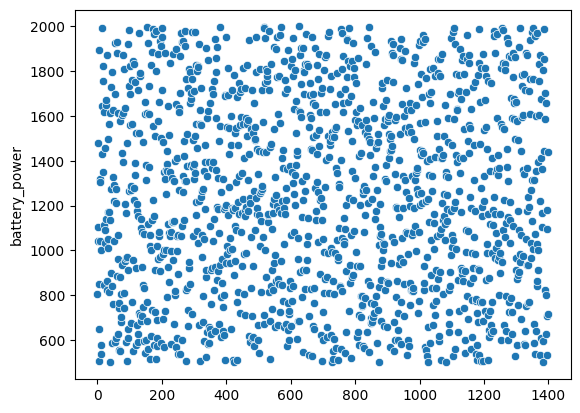

In [153]:
sns.scatterplot(df_train['battery_power'])

#### 2. Duplicate value pada kolom blue, dual_sim, four_g, three_g, touch_screen, wifi

In [131]:
df_train.duplicated('blue').sum()

1398

In [132]:
df_train.duplicated('dual_sim').sum()

1398

In [133]:
df_train.duplicated('four_g').sum()

1398

In [134]:
df_train.duplicated('three_g').sum()

1398

In [135]:
df_train.duplicated('touch_screen').sum()

1398

In [136]:
df_train.duplicated('wifi').sum()

1398

#### 3. Duplicate value pada kolom clock_speed

In [137]:
df_train.duplicated('clock_speed').sum()

1374

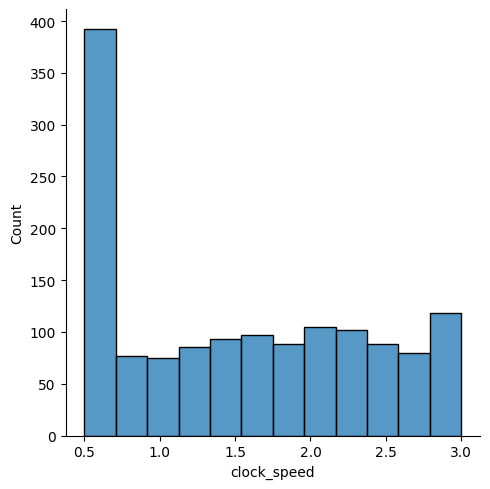

In [143]:
sns.displot(df_train['clock_speed'])

#### 4. Duplicate value pada kolom fc dan pc

In [149]:
df_train.duplicated('fc').sum()

1380

In [171]:
df_train.duplicated('pc').sum()

1379

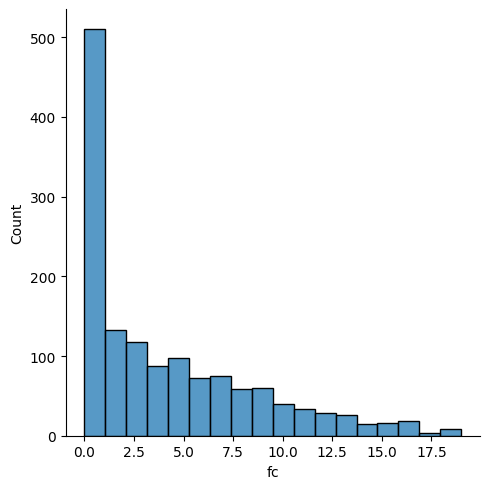

In [148]:
sns.displot(df_train['fc'])

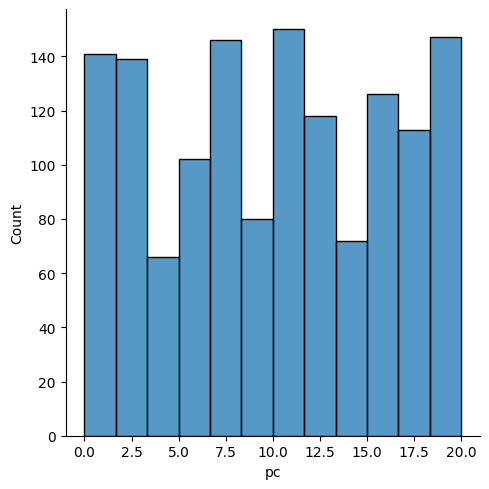

In [172]:
sns.displot(df_train['pc'])

#### 5. Duplicate value pada kolom int_memory

In [150]:
df_train.duplicated('int_memory').sum()

1337

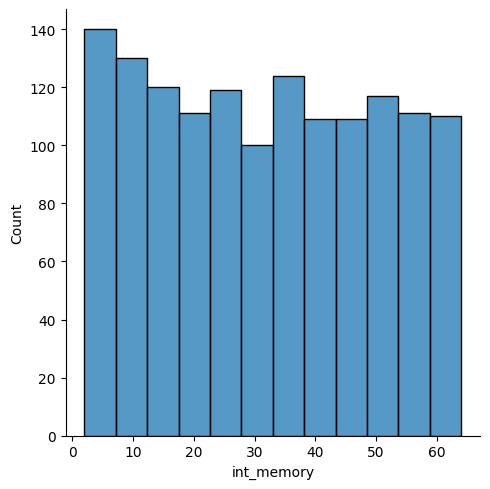

In [151]:
sns.displot(df_train['int_memory'])

#### 6. Duplicate value pada kolom m_dep

In [155]:
df_train.duplicated('m_dep').sum()

1390

<Axes: ylabel='m_dep'>

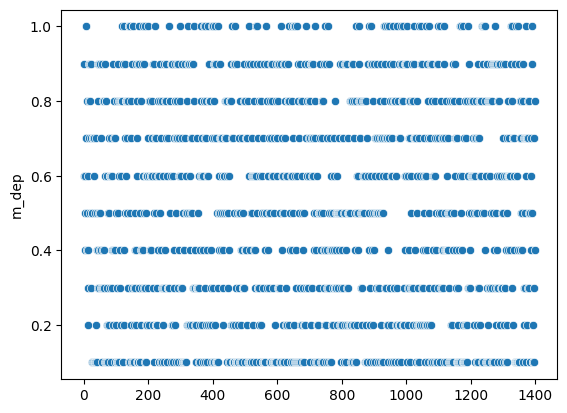

In [157]:
sns.scatterplot(df_train['m_dep'])

#### 7. Duplicate value pada kolom mobile_wt

In [159]:
df_train.duplicated('mobile_wt').sum()

1279

<Axes: ylabel='mobile_wt'>

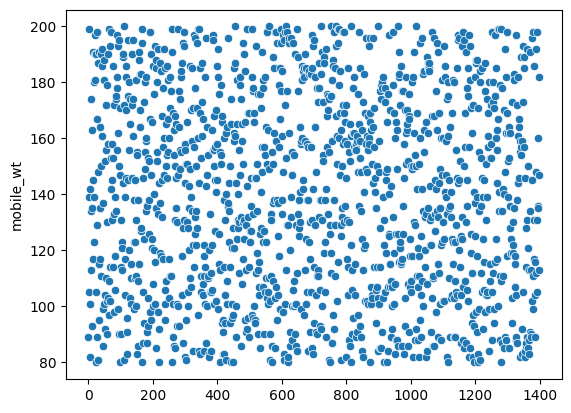

In [162]:
sns.scatterplot(df_train['mobile_wt'])

#### 8. Duplicate value pada kolom n_cores

In [170]:
df_train.duplicated('n_cores').sum()

1392

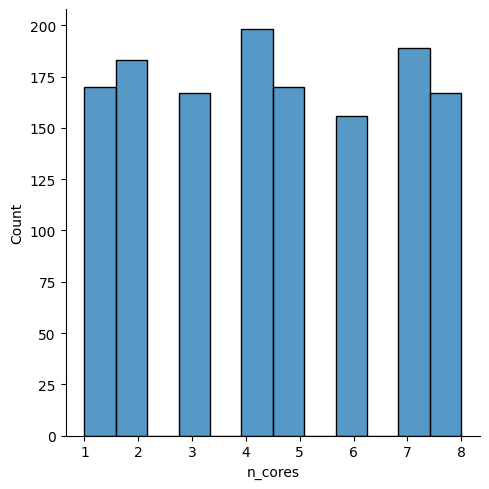

In [169]:
sns.displot(df_train['n_cores'])

#### 9. Duplicate value pada kolom px_height dan px_width

In [173]:
df_train.duplicated('px_height').sum()

465

In [174]:
df_train.duplicated('px_width').sum()

492

<Axes: ylabel='px_height'>

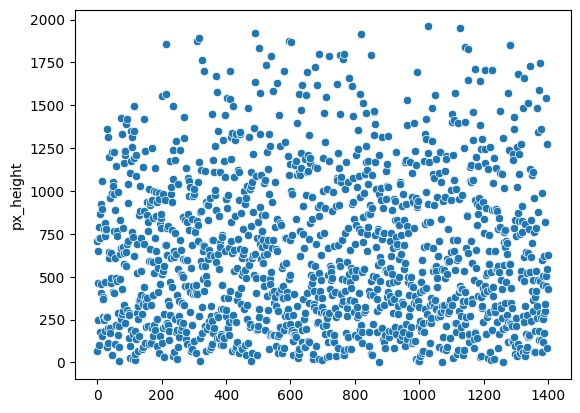

In [179]:
sns.scatterplot(df_train['px_height'])

<Axes: ylabel='px_width'>

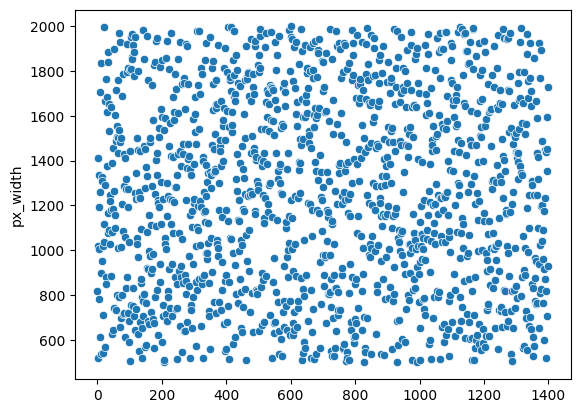

In [178]:
sns.scatterplot(df_train['px_width'])

#### 10. Duplicate value pada kolom ram

In [180]:
df_train.duplicated('ram').sum()

230

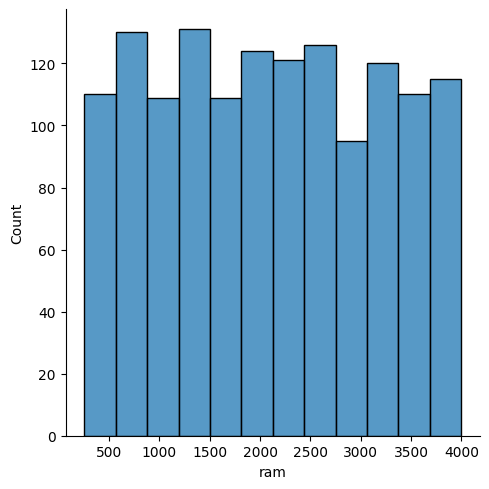

In [184]:
sns.displot(df_train['ram'])

#### 11. Duplicate value pada kolom sc_h dan sc_w


In [185]:
df_train.duplicated('sc_h').sum()

1385

In [186]:
df_train.duplicated('sc_w').sum()

1381

<Axes: ylabel='sc_h'>

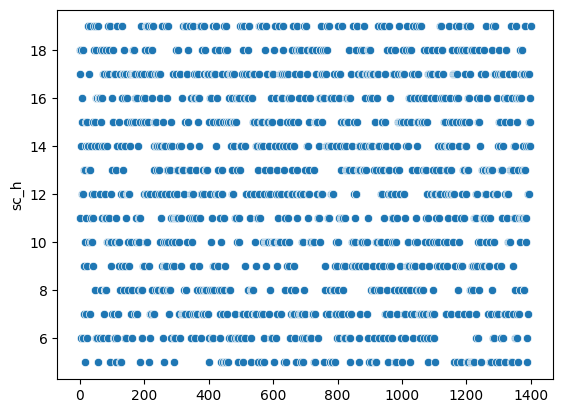

In [188]:
sns.scatterplot(df_train['sc_h'])

<Axes: ylabel='sc_w'>

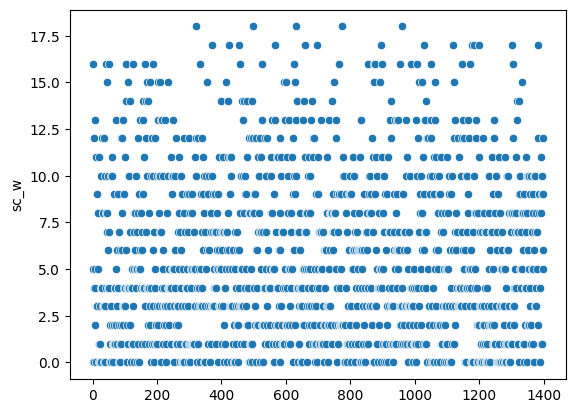

In [189]:
sns.scatterplot(df_train['sc_w'])

#### 12. Duplicate value pada kolom sc_h dan sc_w

In [190]:
df_train.duplicated('talk_time').sum()

1381

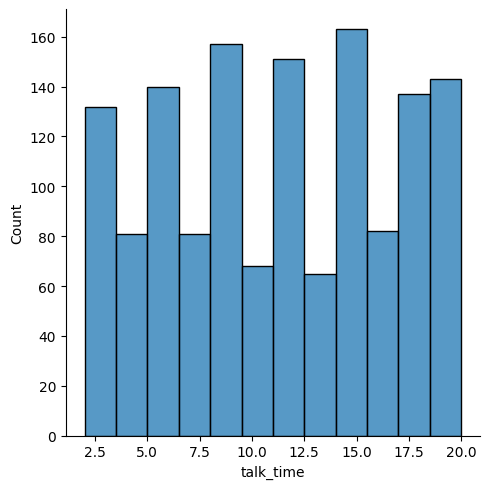

In [192]:
sns.displot(df_train['talk_time'])

#### 13. Duplicate value pada kolom price_range 

In [195]:
df_train.duplicated('price_range').sum()

1396

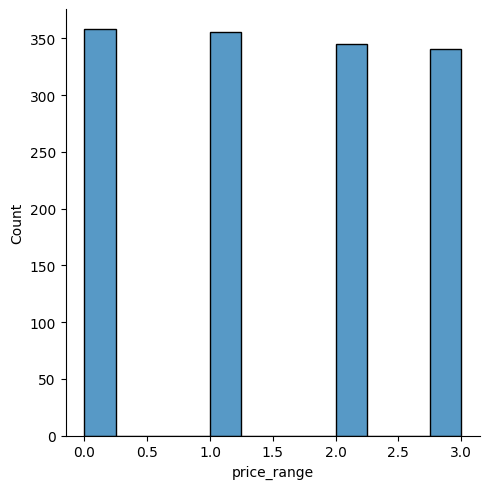

In [196]:
sns.displot(df_train['price_range'])